In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis import align
import numpy as np
from itertools import combinations
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

# Load the topology and trajectory files for both MD simulations
u1 = mda.Universe("myc_091-160_stripped.prmtop", "aMD_091-160_no1-4_stripped.nc")
u2 = mda.Universe("myc_091-160_D132-H_stripped.prmtop", "aMD_091-160_D132-H_no1-4_stripped.nc")

In [2]:
cluster_4 = [
    18177, 18179, 18181, 17800, 17801, 18187, 18197, 18199, 17816, 18204,
    18078, 18084, 18085, 18212, 18091, 18092, 18222, 17967, 17713, 18227,
    18102, 18230, 18104, 18108, 18111, 17983, 17856, 17859, 17860, 17989,
    17863, 17746, 17749, 18006, 17881, 17883, 17756, 17889, 18146, 18275, 
    17769, 17897, 18037, 17781, 18039
]

# N = 45
# O = 0.0222

In [3]:
cluster_6 = [
    7429, 7559, 7434, 7567, 7445, 7574, 7573, 7577, 7450, 7580,
    7452, 7582, 7455, 7585, 7586, 7458, 7461, 7462, 7597, 7470, 
    7598, 7480, 7610, 7484, 7615, 7491, 7368, 7497, 7627, 7373, 
    7504, 7380, 7638, 7384, 7641, 7385, 7517, 7520, 7521, 7652, 
    7653, 7529, 7403, 7660, 7533, 7534, 7662, 7405, 7659, 7419, 
    7548, 7421, 7550, 7551
]

# N = 54
# O = 0.0185

In [4]:
cluster_9 = [
    15637, 15779, 15781, 15655, 15783, 15785, 15787, 15791, 15802, 15808,
    15809, 15810, 15816, 15819, 15820, 15828, 15836, 15837, 15848, 15851,
    15852, 15858, 15860
]

# N = 23
# O = 0.0435

In [5]:
cluster_12 = [
    19463, 19986, 19987, 19476, 19995, 19485, 19486, 19374, 19761, 19762,
    19904, 19651, 19396, 19656, 19408, 19409, 19429, 19966, 19967
]

# N = 19
# O = 0.0526

In [6]:
non_cluster = [
    30606, 20042, 33015, 38357, 32961, 32563, 32134, 18455, 36312, 32089, 
    33373, 30139, 20291, 36889, 36099, 14005, 19048, 36307, 31420, 33844,
]

# N = 20
# O = 0.05

# No Cluster 

Aligning frames: 100%|█████████████████████████| 20/20 [00:00<00:00, 175.52it/s]


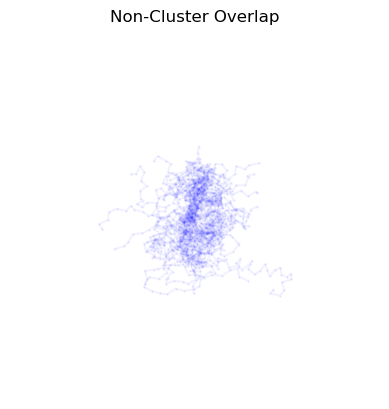

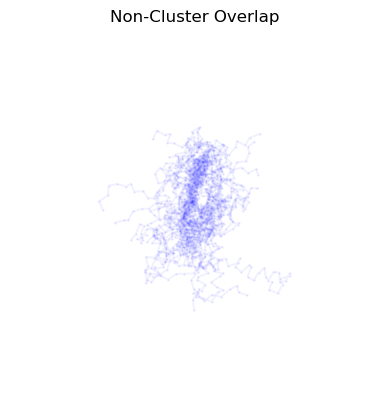

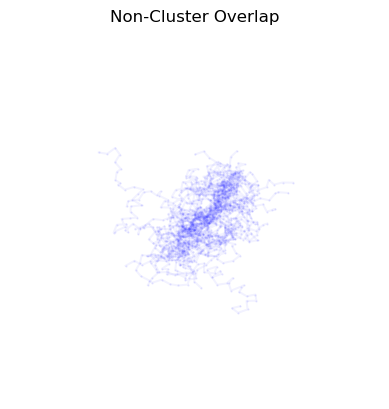

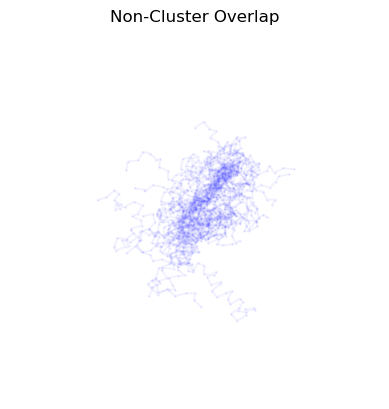

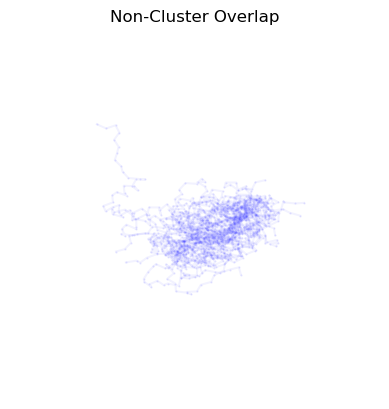

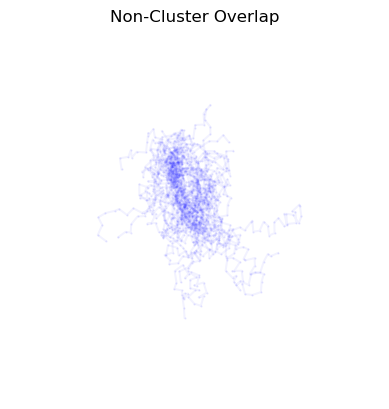

In [7]:
# Define the function to extract frames from both universes
def extract_frames(indices, universe1, universe2, switch_index=40000):
    frames = []
    for idx in tqdm(indices, desc="Extracting frames"):
        if idx < switch_index:
            universe1.trajectory[idx]
            frames.append(universe1.select_atoms("name CA").positions.copy())
        else:
            universe2.trajectory[idx - switch_index]
            frames.append(universe2.select_atoms("name CA").positions.copy())
    return frames

# Extract frames for cluster 9
frames_cluster_9 = extract_frames(non_cluster, u1, u2)

# Create a temporary Universe for alignment
def create_temp_universe(positions, universe):
    temp_universe = mda.Merge(universe.select_atoms("name CA"))
    temp_universe.atoms.positions = positions
    return temp_universe

# Align frames using AlignTraj
def align_frames(reference_universe, frames, select_for_alignment):
    aligned_frames = []
    for frame_positions in tqdm(frames, desc="Aligning frames"):
        temp_universe = create_temp_universe(frame_positions, reference_universe)
        aligner = align.AlignTraj(temp_universe, reference_universe, select=select_for_alignment, in_memory=True)
        aligner.run()
        aligned_frames.append(temp_universe.atoms.positions.copy())
    return aligned_frames

# Selection string for residues 15-30 to ensure alignment of corresponding residues
select_residues_15_30 = "resid 15-30 and name CA"

# Create reference universe for alignment
reference_universe = create_temp_universe(frames_cluster_9[0], u1)

# Align frames for cluster 9 using the specific residues 15-30
aligned_frames_cluster_9 = align_frames(reference_universe, frames_cluster_9, select_residues_15_30)

# Set a fixed opacity value
fixed_opacity = 0.05

# Plot the aligned frames from different angles
angles = [(30, 30), (60, 30), (30, 60), (60, 60), (0, 90), (90, 0)]

for angle in angles:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot cluster 9 frames with lines connecting the alpha carbons
    for positions in aligned_frames_cluster_9:
        ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], 'o-', color='blue', markersize=1, markeredgewidth=0.8, alpha=fixed_opacity)
    
    ax.view_init(elev=angle[0], azim=angle[1])
    ax.set_axis_off()  # Remove axes
    ax.grid(False)     # Remove grid lines
    plt.title(f'Non-Cluster Overlap')
    plt.show()

# Cluster 4

Aligning frames: 100%|█████████████████████████| 45/45 [00:00<00:00, 169.43it/s]


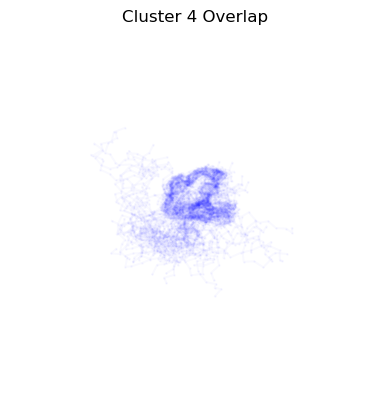

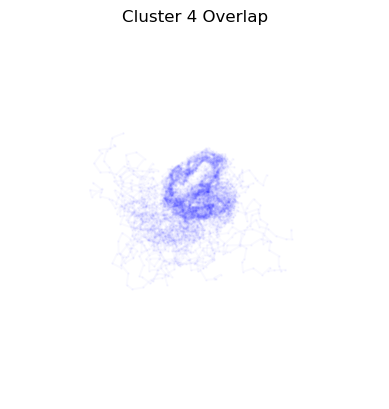

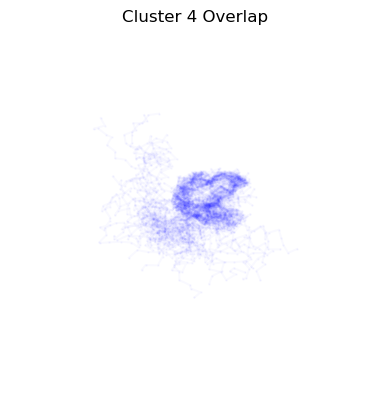

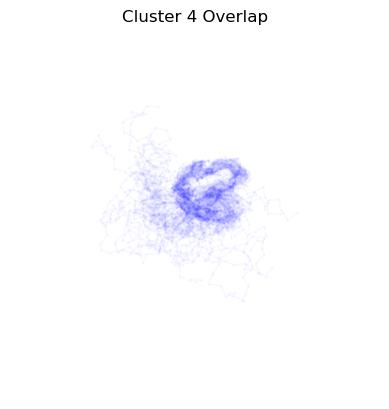

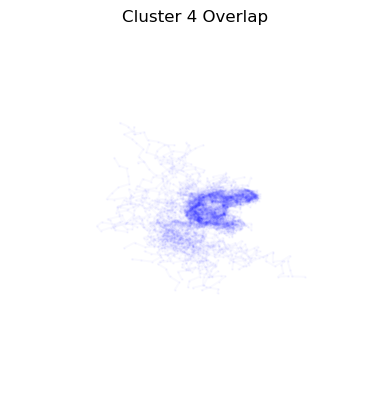

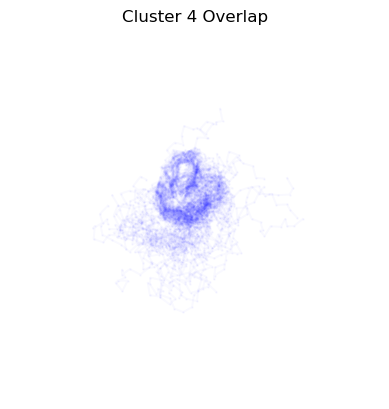

In [8]:
# Define the function to extract frames from both universes
def extract_frames(indices, universe1, universe2, switch_index=40000):
    frames = []
    for idx in tqdm(indices, desc="Extracting frames"):
        if idx < switch_index:
            universe1.trajectory[idx]
            frames.append(universe1.select_atoms("name CA").positions.copy())
        else:
            universe2.trajectory[idx - switch_index]
            frames.append(universe2.select_atoms("name CA").positions.copy())
    return frames

# Extract frames for cluster 9
frames_cluster_9 = extract_frames(cluster_4, u1, u2)

# Create a temporary Universe for alignment
def create_temp_universe(positions, universe):
    temp_universe = mda.Merge(universe.select_atoms("name CA"))
    temp_universe.atoms.positions = positions
    return temp_universe

# Align frames using AlignTraj
def align_frames(reference_universe, frames, select_for_alignment):
    aligned_frames = []
    for frame_positions in tqdm(frames, desc="Aligning frames"):
        temp_universe = create_temp_universe(frame_positions, reference_universe)
        aligner = align.AlignTraj(temp_universe, reference_universe, select=select_for_alignment, in_memory=True)
        aligner.run()
        aligned_frames.append(temp_universe.atoms.positions.copy())
    return aligned_frames

# Selection string for residues 15-30 to ensure alignment of corresponding residues
select_residues_15_30 = "resid 15-30 and name CA"

# Create reference universe for alignment
reference_universe = create_temp_universe(frames_cluster_9[0], u1)

# Align frames for cluster 9 using the specific residues 15-30
aligned_frames_cluster_9 = align_frames(reference_universe, frames_cluster_9, select_residues_15_30)

# Set a fixed opacity value
fixed_opacity = 0.0222

# Plot the aligned frames from different angles
angles = [(30, 30), (60, 30), (30, 60), (60, 60), (0, 90), (90, 0)]

for angle in angles:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot cluster 9 frames with lines connecting the alpha carbons
    for positions in aligned_frames_cluster_9:
        ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], 'o-', color='blue', markersize=1, markeredgewidth=0.8, alpha=fixed_opacity)
    
    ax.view_init(elev=angle[0], azim=angle[1])
    ax.set_axis_off()  # Remove axes
    ax.grid(False)     # Remove grid lines
    plt.title(f'Cluster 4 Overlap')
    plt.show()

# Cluster 6

Aligning frames: 100%|█████████████████████████| 54/54 [00:00<00:00, 133.86it/s]


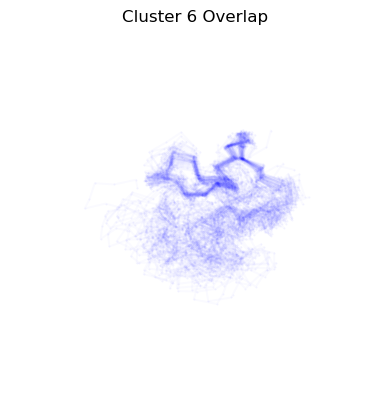

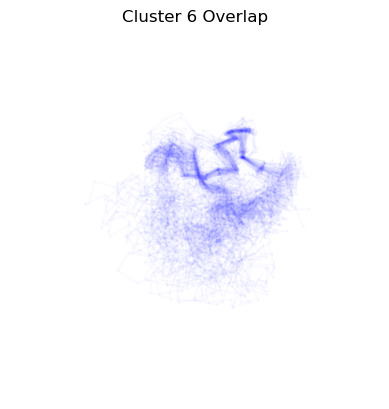

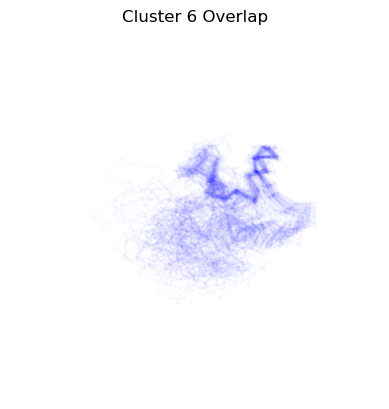

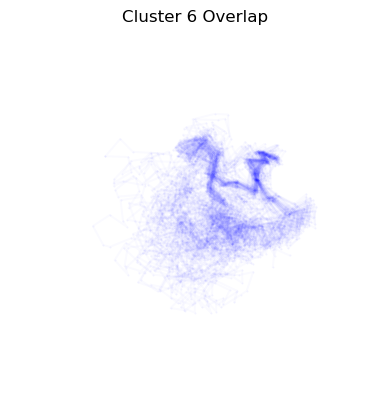

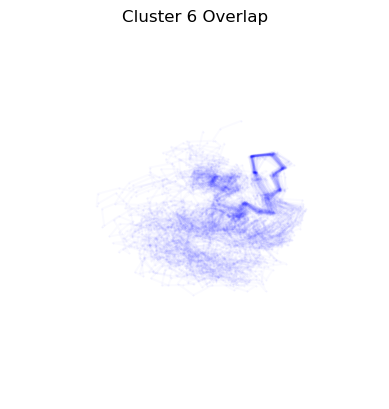

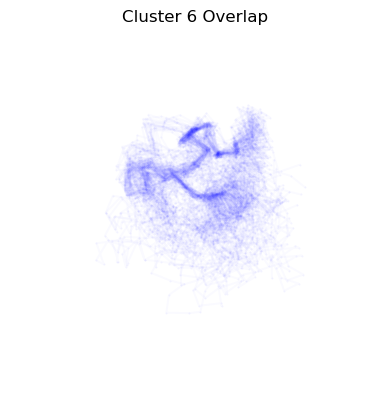

In [9]:
# Define the function to extract frames from both universes
def extract_frames(indices, universe1, universe2, switch_index=40000):
    frames = []
    for idx in tqdm(indices, desc="Extracting frames"):
        if idx < switch_index:
            universe1.trajectory[idx]
            frames.append(universe1.select_atoms("name CA").positions.copy())
        else:
            universe2.trajectory[idx - switch_index]
            frames.append(universe2.select_atoms("name CA").positions.copy())
    return frames

# Extract frames for cluster 9
frames_cluster_9 = extract_frames(cluster_6, u1, u2)

# Create a temporary Universe for alignment
def create_temp_universe(positions, universe):
    temp_universe = mda.Merge(universe.select_atoms("name CA"))
    temp_universe.atoms.positions = positions
    return temp_universe

# Align frames using AlignTraj
def align_frames(reference_universe, frames, select_for_alignment):
    aligned_frames = []
    for frame_positions in tqdm(frames, desc="Aligning frames"):
        temp_universe = create_temp_universe(frame_positions, reference_universe)
        aligner = align.AlignTraj(temp_universe, reference_universe, select=select_for_alignment, in_memory=True)
        aligner.run()
        aligned_frames.append(temp_universe.atoms.positions.copy())
    return aligned_frames

# Selection string for residues 15-30 to ensure alignment of corresponding residues
select_residues_15_30 = "resid 15-30 and name CA"

# Create reference universe for alignment
reference_universe = create_temp_universe(frames_cluster_9[0], u1)

# Align frames for cluster 9 using the specific residues 15-30
aligned_frames_cluster_9 = align_frames(reference_universe, frames_cluster_9, select_residues_15_30)

# Set a fixed opacity value
fixed_opacity = 0.0185

# Plot the aligned frames from different angles
angles = [(30, 30), (60, 30), (30, 60), (60, 60), (0, 90), (90, 0)]

for angle in angles:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot cluster 9 frames with lines connecting the alpha carbons
    for positions in aligned_frames_cluster_9:
        ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], 'o-', color='blue', markersize=1, markeredgewidth=0.8, alpha=fixed_opacity)
    
    ax.view_init(elev=angle[0], azim=angle[1])
    ax.set_axis_off()  # Remove axes
    ax.grid(False)     # Remove grid lines
    plt.title(f'Cluster 6 Overlap')
    plt.show()

# Cluster 9

Aligning frames: 100%|█████████████████████████| 23/23 [00:00<00:00, 165.40it/s]


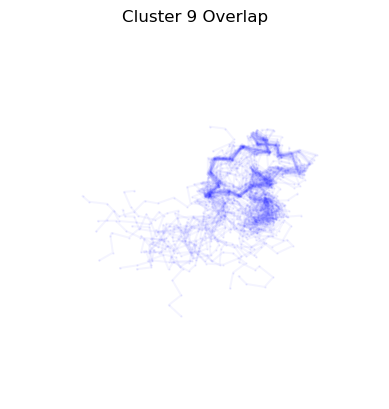

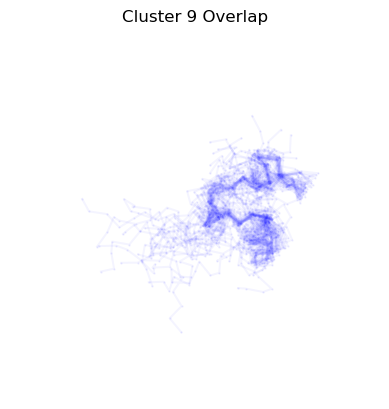

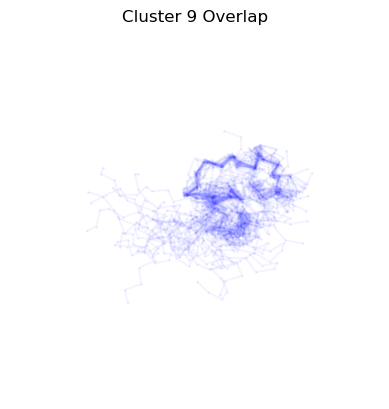

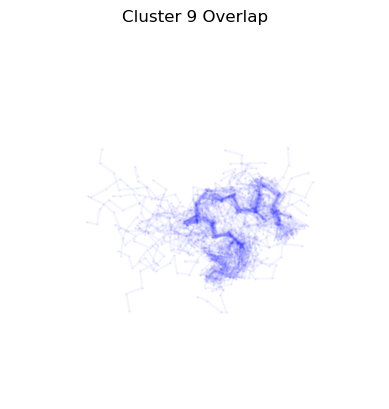

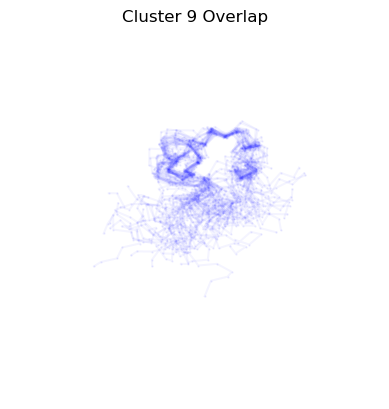

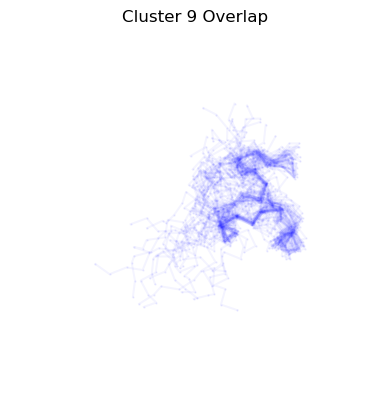

In [10]:
# Define the function to extract frames from both universes
def extract_frames(indices, universe1, universe2, switch_index=40000):
    frames = []
    for idx in tqdm(indices, desc="Extracting frames"):
        if idx < switch_index:
            universe1.trajectory[idx]
            frames.append(universe1.select_atoms("name CA").positions.copy())
        else:
            universe2.trajectory[idx - switch_index]
            frames.append(universe2.select_atoms("name CA").positions.copy())
    return frames

# Extract frames for cluster 9
frames_cluster_9 = extract_frames(cluster_9, u1, u2)

# Create a temporary Universe for alignment
def create_temp_universe(positions, universe):
    temp_universe = mda.Merge(universe.select_atoms("name CA"))
    temp_universe.atoms.positions = positions
    return temp_universe

# Align frames using AlignTraj
def align_frames(reference_universe, frames, select_for_alignment):
    aligned_frames = []
    for frame_positions in tqdm(frames, desc="Aligning frames"):
        temp_universe = create_temp_universe(frame_positions, reference_universe)
        aligner = align.AlignTraj(temp_universe, reference_universe, select=select_for_alignment, in_memory=True)
        aligner.run()
        aligned_frames.append(temp_universe.atoms.positions.copy())
    return aligned_frames

# Selection string for residues 15-30 to ensure alignment of corresponding residues
select_residues_15_30 = "resid 15-30 and name CA"

# Create reference universe for alignment
reference_universe = create_temp_universe(frames_cluster_9[0], u1)

# Align frames for cluster 9 using the specific residues 15-30
aligned_frames_cluster_9 = align_frames(reference_universe, frames_cluster_9, select_residues_15_30)

# Set a fixed opacity value
fixed_opacity = 0.0435

# Plot the aligned frames from different angles
angles = [(30, 30), (60, 30), (30, 60), (60, 60), (0, 90), (90, 0)]

for angle in angles:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot cluster 9 frames with lines connecting the alpha carbons
    for positions in aligned_frames_cluster_9:
        ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], 'o-', color='blue', markersize=1, markeredgewidth=0.8, alpha=fixed_opacity)
    
    ax.view_init(elev=angle[0], azim=angle[1])
    ax.set_axis_off()  # Remove axes
    ax.grid(False)     # Remove grid lines
    plt.title(f'Cluster 9 Overlap')
    plt.show()

# Cluster 12

Aligning frames: 100%|█████████████████████████| 19/19 [00:00<00:00, 177.97it/s]


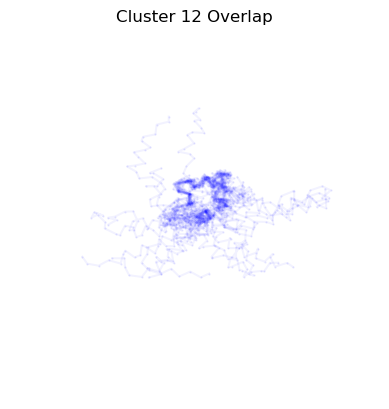

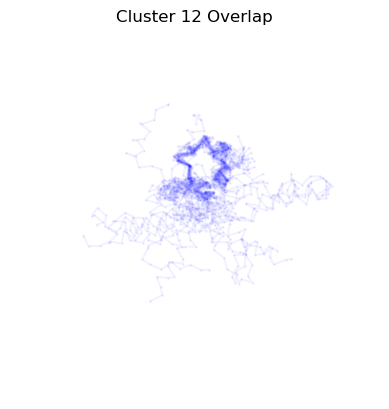

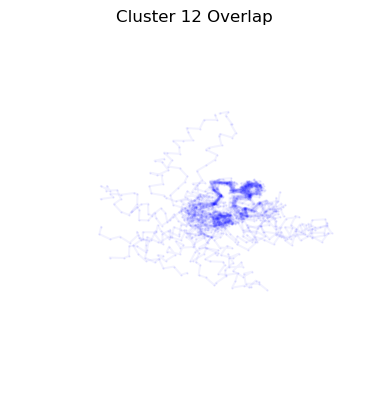

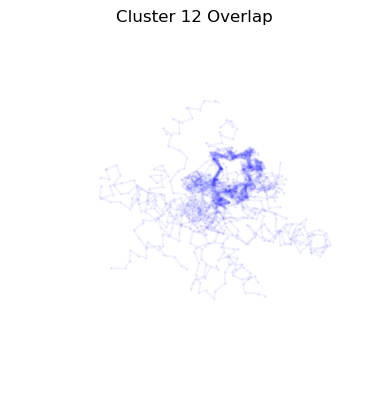

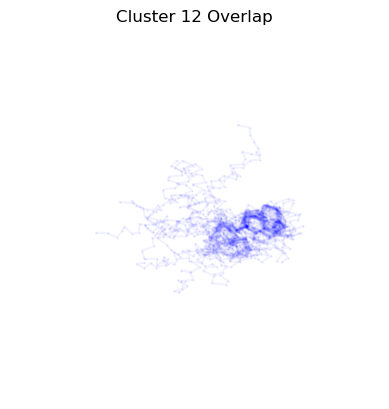

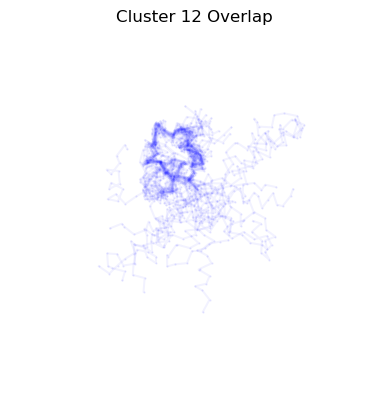

In [11]:
# Define the function to extract frames from both universes
def extract_frames(indices, universe1, universe2, switch_index=40000):
    frames = []
    for idx in tqdm(indices, desc="Extracting frames"):
        if idx < switch_index:
            universe1.trajectory[idx]
            frames.append(universe1.select_atoms("name CA").positions.copy())
        else:
            universe2.trajectory[idx - switch_index]
            frames.append(universe2.select_atoms("name CA").positions.copy())
    return frames

# Extract frames for cluster 9
frames_cluster_9 = extract_frames(cluster_12, u1, u2)

# Create a temporary Universe for alignment
def create_temp_universe(positions, universe):
    temp_universe = mda.Merge(universe.select_atoms("name CA"))
    temp_universe.atoms.positions = positions
    return temp_universe

# Align frames using AlignTraj
def align_frames(reference_universe, frames, select_for_alignment):
    aligned_frames = []
    for frame_positions in tqdm(frames, desc="Aligning frames"):
        temp_universe = create_temp_universe(frame_positions, reference_universe)
        aligner = align.AlignTraj(temp_universe, reference_universe, select=select_for_alignment, in_memory=True)
        aligner.run()
        aligned_frames.append(temp_universe.atoms.positions.copy())
    return aligned_frames

# Selection string for residues 15-30 to ensure alignment of corresponding residues
select_residues_15_30 = "resid 15-30 and name CA"

# Create reference universe for alignment
reference_universe = create_temp_universe(frames_cluster_9[0], u1)

# Align frames for cluster 9 using the specific residues 15-30
aligned_frames_cluster_9 = align_frames(reference_universe, frames_cluster_9, select_residues_15_30)

# Set a fixed opacity value
fixed_opacity = 0.0526

# Plot the aligned frames from different angles
angles = [(30, 30), (60, 30), (30, 60), (60, 60), (0, 90), (90, 0)]

for angle in angles:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot cluster 9 frames with lines connecting the alpha carbons
    for positions in aligned_frames_cluster_9:
        ax.plot(positions[:, 0], positions[:, 1], positions[:, 2], 'o-', color='blue', markersize=1, markeredgewidth=0.8, alpha=fixed_opacity)
    
    ax.view_init(elev=angle[0], azim=angle[1])
    ax.set_axis_off()  # Remove axes
    ax.grid(False)     # Remove grid lines
    plt.title(f'Cluster 12 Overlap')
    plt.show()